In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from fundusData.datamodules.classification import DDRDataModule, IDRiDDataModule, EyePACSDataModule, AptosDataModule
from fundusData.datamodules.utils import merge_existing_datamodules
from fundusData.datamodules import CLASSIF_PATHS, SEG_PATHS

In [12]:
img_size = (512, 512)
idrid_datamodule = IDRiDDataModule(CLASSIF_PATHS.IDRID, img_size=img_size, batch_size=8).setup_all()
eyepacs_datamodule = EyePACSDataModule(CLASSIF_PATHS.EYEPACS, img_size=img_size, batch_size=8).setup_all()
aptos_datamodule = AptosDataModule(CLASSIF_PATHS.APTOS, img_size=img_size, batch_size=8).setup_all()
ddr_datamodule = DDRDataModule(CLASSIF_PATHS.DDR, img_size=img_size, batch_size=8).setup_all()


/home/clement/miniforge-pypy3/envs/cugraph/lib/python3.10/site-packages/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


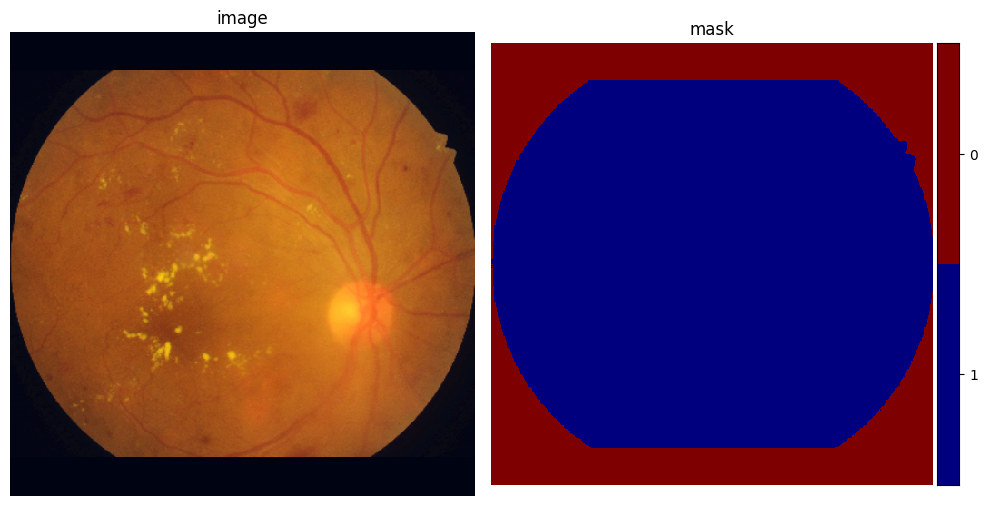

In [13]:
datamodules = merge_existing_datamodules([idrid_datamodule, eyepacs_datamodule, aptos_datamodule, ddr_datamodule], 
                                         separate_test_sets=False)

datamodules.train.plot(0)

In [5]:
from fundusData.datasets.segmentation import get_IDRiD_dataset, DatasetVariant
img_size = (512, 512)
idrid_seg_dataset = get_IDRiD_dataset(SEG_PATHS.IDRID, variant=DatasetVariant.TRAIN, img_size=img_size)

Exception ignored in: <function AbstractImageDataset.__del__ at 0x7f8bdbf9bbe0>
Traceback (most recent call last):
  File "/home/clement/miniforge-pypy3/envs/cugraph/lib/python3.10/site-packages/nntools/dataset/abstract_image_dataset.py", line 156, in __del__
    if self.use_cache and self.cache_initialized and self._is_first_process:
AttributeError: 'SegmentationDataset' object has no attribute 'use_cache'


TypeError: SegmentationDataset.__init__() got an unexpected keyword argument 'sort_func'